In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("headbrain.csv")

In [3]:
data.head()

,Gender,AgeRange,HeadSize,BrainWeight
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [5]:
df=pd.DataFrame(data=data)

{'whiskers': [<matplotlib.lines.Line2D at 0x204ffebb6d8>,
 'caps': [<matplotlib.lines.Line2D at 0x204810fbcf8>,
 'boxes': [<matplotlib.lines.Line2D at 0x204810fb2b0>],
 'medians': [<matplotlib.lines.Line2D at 0x204810ed3c8>],
 'fliers': [<matplotlib.lines.Line2D at 0x204810ed710>],
 'means': []}

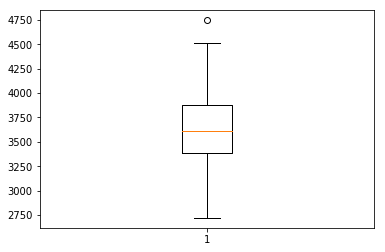

In [7]:
#almost no outlier
plt.boxplot(df["HeadSize"])

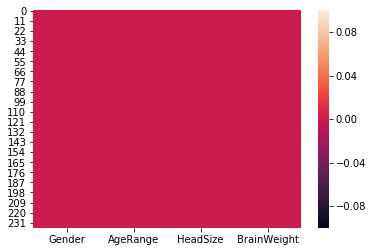

In [8]:
#no NaN values
sns.heatmap(df.isnull())

{'whiskers': [<matplotlib.lines.Line2D at 0x20482233f60>,
 'caps': [<matplotlib.lines.Line2D at 0x20482398b70>,
 'boxes': [<matplotlib.lines.Line2D at 0x20482398128>],
 'medians': [<matplotlib.lines.Line2D at 0x20482398f60>],
 'fliers': [<matplotlib.lines.Line2D at 0x204823a1588>],
 'means': []}

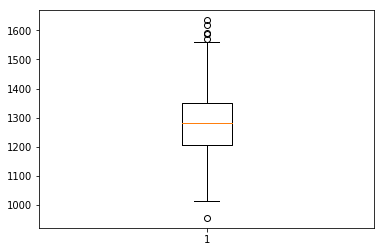

In [10]:
plt.boxplot(df["BrainWeight"])

In [14]:
z=np.abs(zscore(df))
z

array([[0.8767307 , 1.07449777, 2.40886829, 2.0579083 ],
       [0.8767307 , 1.07449777, 0.28535333, 0.11763692],
       [0.8767307 , 1.07449777, 1.72023489, 0.43407603],
       [0.8767307 , 1.07449777, 0.39235214, 0.00727325],
       [0.8767307 , 1.07449777, 1.4897759 , 2.557549  ],
       [0.8767307 , 1.07449777, 0.13441126, 0.14261896],
       [0.8767307 , 1.07449777, 0.41430062, 0.97535345],
       [0.8767307 , 1.07449777, 0.2057438 , 0.23211156],
       [0.8767307 , 1.07449777, 0.05759159, 0.60062293],
       [0.8767307 , 1.07449777, 0.95478182, 0.76716983],
       [0.8767307 , 1.07449777, 0.52399669, 0.47571276],
       [0.8767307 , 1.07449777, 0.98496097, 0.80880656],
       [0.8767307 , 1.07449777, 0.01648451, 0.60062293],
       [0.8767307 , 1.07449777, 1.57482624, 1.99128954],
       [0.8767307 , 1.07449777, 0.54324791, 0.62349678],
       [0.8767307 , 1.07449777, 0.66396452, 1.01699018],
       [0.8767307 , 1.07449777, 0.37584448, 0.62560497],
       [0.8767307 , 1.07449777,

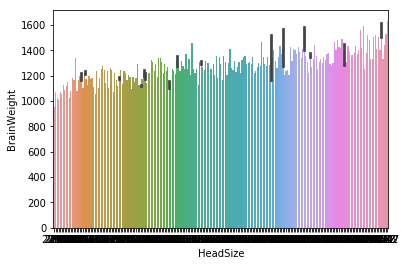

In [15]:
#sns.barplot(x="HeadSize",y="BrainWeight",data=df)

In [16]:
threshold=3
print(np.where(z>3))

(array([24], dtype=int64), array([2], dtype=int64))


In [18]:
z[24][2]

3.0536047510297246

In [19]:
df_new=df[(z<3).all(axis=1)]
df_new.head()

,Gender,AgeRange,HeadSize,BrainWeight
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [21]:
df.shape

(237, 4)

In [34]:
df_new.shape

(236, 4)

In [47]:
x=df_new.iloc[:,0:-1]

In [48]:
x.head()

,Gender,AgeRange,HeadSize
0,1,1,4512
1,1,1,3738
2,1,1,4261
3,1,1,3777
4,1,1,4177


In [49]:
y=df_new.iloc[:,-1]
y.head()

0    1530
1    1297
2    1335
3    1282
4    1590
Name: BrainWeight, dtype: int64

In [50]:
x.shape


(236, 3)

In [51]:
y.shape

(236,)

In [106]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=46)

In [107]:
lr=LinearRegression()

In [108]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [109]:
#lr.fit(x,y)

In [110]:
#a=df_new["HeadSize"]
#a.head()
#b=df_new["BrainWeight"]

In [111]:
lr.score(x_train,y_train)

0.6251767999913624

In [112]:
pred=lr.predict(x_test)

In [113]:
mean_squared_error(y_test,pred)

3279.441056362732

In [114]:
r2_score(y_test,pred)

0.6761871849068222

In [115]:
td=np.array([1,2,4521])

In [96]:
td.shape

(3,)

In [121]:
td=td.reshape(1,-1)
td

array([[   1,    2, 4521]])

In [126]:
out=lr.predict(td)
print("Brain Weight is", out , "When head size is", td[-1])

Brain Weight is [1501.57535737] When head size is [   1    2 4521]
